In [1]:
## Fetching Dataset

In [2]:
# Import necessary libraries
import numpy as np
from sklearn.datasets import fetch_openml

# Fetch the dataset from OpenML
mnist_dataset = fetch_openml(name='mnist_784', version=1, as_frame=False)
# The 'name' parameter specifies the dataset's name on OpenML (e.g., 'mnist_784' is the MNIST dataset).
# 'version' specifies the version of the dataset. If omitted, the latest version is fetched.
# 'as_frame' determines if the data is returned as a pandas DataFrame (True) or NumPy arrays (False).

In [3]:
# mnist_dataset -> Display the dataset fetched
x, y = mnist_dataset.data, mnist_dataset.target.astype(np.int8) # Split the data into features (x) and target (y)

In [4]:
# Print dataset details
print("Features shape:", x.shape)  # (70000, 784)
print("Target shape:", y.shape)    # (70000,)

Features shape: (70000, 784)
Target shape: (70000,)


In [5]:
# Ensure plots are rendered inline in Jupyter Notebook
%matplotlib inline

# Importing necessary Matplotlib modules
import matplotlib
import matplotlib.pyplot as plt

In [6]:
# Choose an image to display
index = 475  # You can change this index to display different images
image = x[index].reshape(28, 28)  # Reshape the 784-pixel array into 28x28
label = y[index]

np.int8(1)

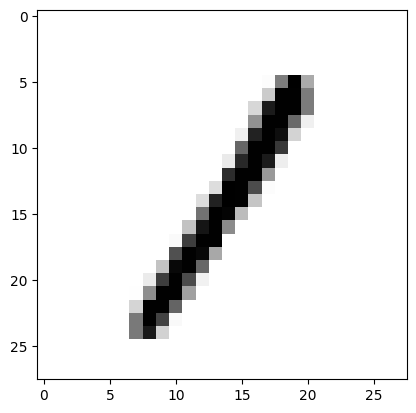

In [7]:
# Display the image using the imshow function.
plt.imshow(
    image,  # The image data to be displayed.
    cmap=plt.cm.binary,  # Sets the colormap to 'binary' for displaying the image in grayscale.
    interpolation='nearest'  # Specifies the interpolation method as 'nearest', which displays the image without smoothing or blurring.
)
# plt.axis("off") # Hides the axes
# plt.show()  # Displays the rendered image on the output screen.

y[index] # Displays corresponding value via the target datzset

In [8]:
# Dataset Splitting

In [9]:
# Selects the first 60,000 samples for training and the remaining samples for testing.
x_train, x_test = x[:60000], x[60000:]
y_train, y_test = y[:60000], y[60000:] 

In [10]:
# Importing NumPy, a library for numerical computations.
import numpy as np 

# Generate a random permutation of indices from 0 to 59999.
shuffle_index = np.random.permutation(60000)

# Shuffle the training data (features and labels) using the random indices.
x_train, y_train = x_train[shuffle_index], y_train[shuffle_index]

In [11]:
## Building a Number 1 detector

In [12]:
# Create binary labels for a classifier that detects whether a sample belongs to a specific class (in this case, the class "2")
y_train_2 = (y_train != 1)
y_test_2 = (y_test != 1)

In [13]:
# Import necessary libraries
from sklearn.linear_model import LogisticRegression

# Initialize the logistic regression classifier.
clf = LogisticRegression(tol = 0.1)

# Train the model using the binary labels (True/False for "2").
clf.fit(x_train, y_train_2)

LogisticRegression(tol=0.1)

In [14]:
clf.predict([x[index]]) # Prediction

array([False])

In [15]:
# Importing cross_val_score from the sklearn.model_selection module
from sklearn.model_selection import cross_val_score

# Using cross-validation to evaluate the performance of the classifier (clf) on the training data
# 'x_train' represents the feature data, and 'y_train_2' represents the target labels for the np.int8(2) classification task
# The 'cv=3' parameter specifies that the data will be split into 3 folds for cross-validation
# 'scoring="accuracy"' indicates that accuracy will be used as the evaluation metric

scores = cross_val_score(clf, x_train, y_train_2, cv=3, scoring="accuracy")

# Mean Value Error
scores.mean()

np.float64(0.9916666666666667)